# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

In [2]:
start_t = time.time()

time.sleep(5)

time_elapsed = time.time() - start_t
print(time_elapsed)

5.00804591178894


### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [3]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [4]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [5]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.002
-0.002
-0.002
-0.002
0.0
-0.002
-0.003
-0.002
0.998
1.002
1.002
1.001
1.001
1.971
1.974
1.974
1.974
1.975
2.978
2.978
2.978
2.977
3.954
3.957
3.957
3.956
3.956
4.934
4.934
4.933
4.933
5.913
5.915
5.915
5.915
6.502
6.504
6.505
6.504
7.096
7.099
7.099
7.098
7.099
8.076
8.077
8.08
8.08
8.079
9.059
9.061
9.064
9.063
9.063
10.047
10.049
10.052
10.051
10.051
11.034
11.038
11.038
11.036
11.037
12.019
12.024
12.024
12.023
12.023
13.007
13.009
13.011
13.01
13.01
13.656
13.657
13.659
13.657
13.658
14.337
14.337
14.335
14.335
14.335
15.322
15.321
15.321
16.307
16.307
16.306
16.306
17.294
17.294
17.292
17.294
18.287
18.287
18.287
18.287
19.27
19.272
19.273
19.273
19.275
20.27
20.274
20.274
20.273
20.273
20.959
20.959
20.959
21.644
21.644
21.642
21.642
22.631
22.631
22.629
22.629
23.618
23.618
23.615
23.617
24.62
24.62
24.618
24.617
25.594
25.594
25.593
25.592
26.597
26.597
26.595
26.595
27.599
27.

56.037
56.037
56.037
56.037
56.037
56.037
56.037
56.037
56.037
56.037
56.037
56.037
56.036
56.036
56.036
56.034
56.034
56.034
56.034
56.034
56.256
56.256
56.256
56.256
56.256
56.256
56.256
56.256
56.255
56.255
56.255
56.256
56.256
56.256
56.251
56.259
56.255
56.255
56.254
56.254
56.254
56.254
56.255
56.256
56.256
56.252
56.252
56.252
56.252
56.252
56.25
56.26
56.253
56.253
56.253
56.253
56.253
56.253
56.253
56.252
56.252
56.252
56.252
56.252
56.251
56.409
56.409
56.408
56.408
56.408
56.408
56.408
56.408
56.408
56.408
56.408
56.408
56.408
56.408
56.408
56.406
56.406
56.406
56.405
56.405
56.405
56.405
56.405
56.405
56.405
56.405
56.404
56.404
56.404
56.403
56.403
56.403
56.403
56.403
56.403
56.403
56.403
56.404
56.404
56.404
56.403
56.403
56.403
56.403
56.402
56.565
56.564
56.564
56.564
56.564
56.564
56.563
56.563
56.563
56.563
56.564
56.578
56.578
56.577
56.576
56.576
56.576
56.576
56.575
56.575
56.575
56.575
56.575
56.574
56.574
56.574
56.574
56.574
56.574
56.573
56.573
56.573
56.572
5

KeyboardInterrupt: 

In [6]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [7]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1448,2896,59.124
1449,2898,59.123
1450,2900,59.122
1451,2902,59.122


<IPython.core.display.Javascript object>


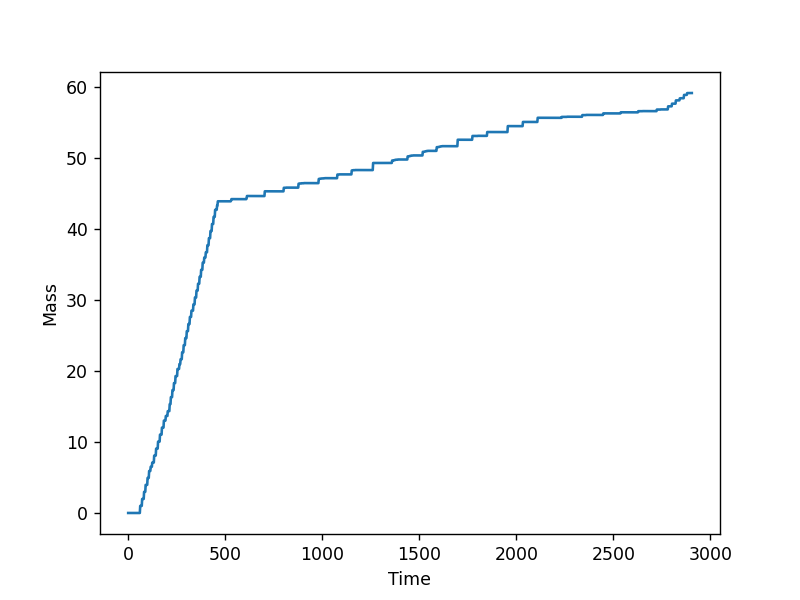

In [8]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [9]:
mass_df.to_csv('mass_data/MassProfile_300523_S553-558.csv')